In [2]:
import os
import numpy as np
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras



In [3]:
def load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES):
    images = []
    labels = []
    
    # loop through category folders
    for category in range(NUM_CATEGORIES):
        category_dir = os.path.join(data_dir, str(category))
        print(f"Loading images from {category_dir}") 
        #loop through and load the images from each folder into the np array
        for filename in os.listdir(category_dir):
            
            if filename.endswith(".ppm") or filename.endswith(".jpg"):
                
                # read image, cv2 does a lot of the heavy lifting for us
                img_path = os.path.join(category_dir, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                
                # add image and label to the lists
                images.append(img) 
                labels.append(category)
    

    return np.array(images), np.array(labels)
    


In [4]:
data_dir = "gtsrb"
IMG_HEIGHT = 30
IMG_WIDTH = 30
NUM_CATEGORIES = 42

print(os.listdir(data_dir))
images, labels = load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES)
print(f"images.shape={images.shape}, labels.shape={labels.shape}")


['32', '35', '34', '33', '.DS_Store', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25']
Loading images from gtsrb/0
Loading images from gtsrb/1
Loading images from gtsrb/2
Loading images from gtsrb/3
Loading images from gtsrb/4
Loading images from gtsrb/5
Loading images from gtsrb/6
Loading images from gtsrb/7
Loading images from gtsrb/8
Loading images from gtsrb/9
Loading images from gtsrb/10
Loading images from gtsrb/11
Loading images from gtsrb/12
Loading images from gtsrb/13
Loading images from gtsrb/14
Loading images from gtsrb/15
Loading images from gtsrb/16
Loading images from gtsrb/17
Loading images from gtsrb/18
Loading images from gtsrb/19
Loading images from gtsrb/20
Loading images from gtsrb/21
Loading images from gtsrb/22
Loading images from gtsrb/23
Loading images from gtsrb/24
Loading images from gts

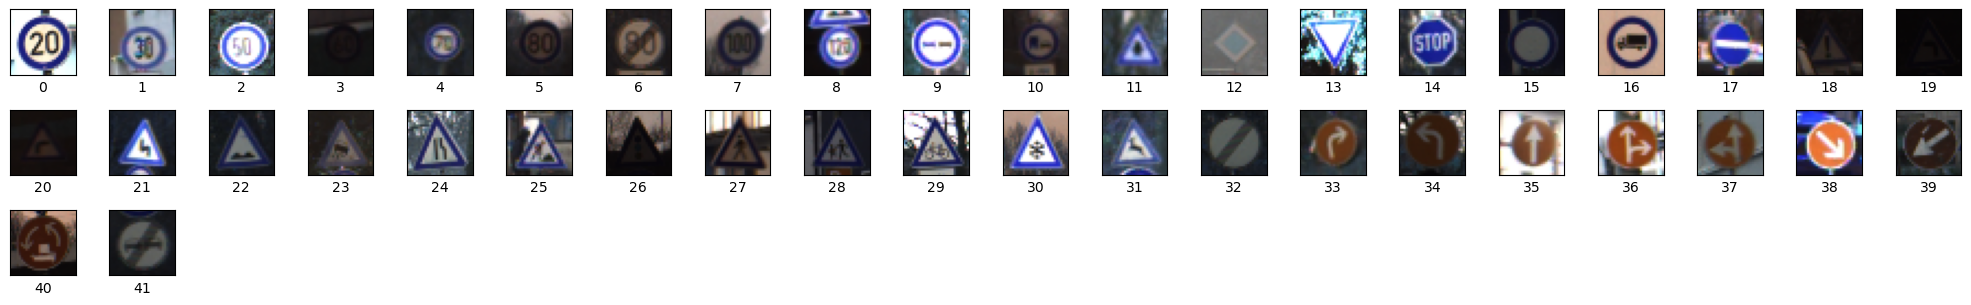

In [5]:

# create a dictionary to store one image per category
category_images = {}
for image, label in zip(images, labels):
    if label not in category_images:
        category_images[label] = image

# visualize the data , taken from stackoverflow lol 
plt.figure(figsize=(20, 20))
for i, (label, image) in enumerate(category_images.items()):
    plt.subplot(20, 20, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
plt.tight_layout()
plt.show()


In [6]:
# scales the images to [0,1]
images = images / 255.0

# flatten the images
reshaped_images = images.reshape(images.shape[0], -1)
print(reshaped_images.shape)

# one hot encoding, thanks tf
one_hot_labels = tf.one_hot(labels, NUM_CATEGORIES).numpy() # convert to numpy array

print(one_hot_labels.shape) # bingo

(26460, 2700)
(26460, 42)


In [7]:
# slit into 60% training and 40% remaining
X_train, X_temp, y_train, y_temp = train_test_split(reshaped_images, one_hot_labels, test_size=0.4, random_state=42)

# split the remaining 40% into 20% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train.shape={X_train.shape}, X_test.shape={X_test.shape}, X_val.shape={X_val.shape}\n"),

# each row now has 2700 "pixels" in its domain. 30*30*3  (thirty by thiry pixels, 3 rgb values)
print(f"shape of X_train[0]={X_train[0].shape}, (should be 2700)\n length of x_train = {len(X_train)}. (number of images in our training set)")

X_train.shape=(15876, 2700), X_test.shape=(5292, 2700), X_val.shape=(5292, 2700)

shape of X_train[0]=(2700,), (should be 2700)
 length of x_train = 15876. (number of images in our training set)


### cool, our data looks swag now. we can start working with it
we can *not* use a cnn, as described by them odule

In [8]:

# start the model
my_model = keras.Sequential([
    tf.keras.Input(shape=(2700,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax'),
])

my_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [keras.metrics.CategoricalAccuracy()],
)

history = my_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
)


Epoch 1/30
497/497 [==============================] - 2s 3ms/step - loss: 2.7327 - categorical_accuracy: 0.3209 - val_loss: 1.8227 - val_categorical_accuracy: 0.4974
Epoch 2/30
497/497 [==============================] - 1s 2ms/step - loss: 1.5554 - categorical_accuracy: 0.5872 - val_loss: 1.4028 - val_categorical_accuracy: 0.6366
Epoch 3/30
497/497 [==============================] - 1s 2ms/step - loss: 1.2209 - categorical_accuracy: 0.7040 - val_loss: 1.0625 - val_categorical_accuracy: 0.7560
Epoch 4/30
497/497 [==============================] - 1s 1ms/step - loss: 1.0788 - categorical_accuracy: 0.7453 - val_loss: 0.9873 - val_categorical_accuracy: 0.7867
Epoch 5/30
497/497 [==============================] - 1s 1ms/step - loss: 0.9458 - categorical_accuracy: 0.7899 - val_loss: 0.8982 - val_categorical_accuracy: 0.8148
Epoch 6/30
497/497 [==============================] - 1s 2ms/step - loss: 0.8656 - categorical_accuracy: 0.8238 - val_loss: 1.3161 - val_categorical_accuracy: 0.7077
Epoc

166/166 [==============================] - 0s 531us/step - loss: 0.6629 - categorical_accuracy: 0.9048
accuracy on test set: 0.9047619104385376


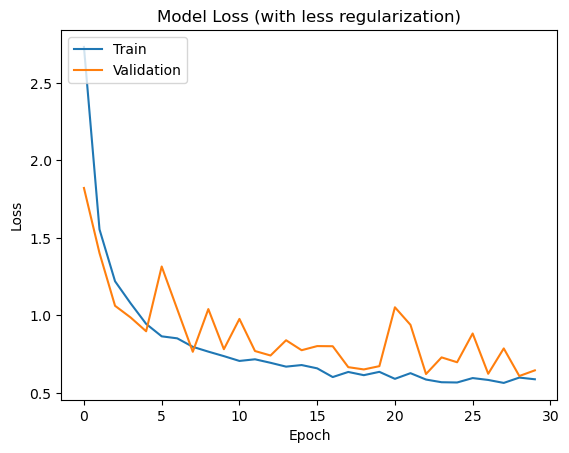

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"accuracy on test set: {my_model.evaluate(X_test, y_test)[1]}")

not bad! i wonder if more epochs can make the cv a bit closer to our loss

In [10]:

newer_model = keras.Sequential([
    tf.keras.Input(shape=(2700,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax'),
])

newer_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [keras.metrics.CategoricalAccuracy()],
)

newer_history = newer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
)


Epoch 1/50
497/497 [==============================] - 1s 2ms/step - loss: 2.8439 - categorical_accuracy: 0.2964 - val_loss: 2.0600 - val_categorical_accuracy: 0.4524
Epoch 2/50
497/497 [==============================] - 1s 1ms/step - loss: 1.6548 - categorical_accuracy: 0.5603 - val_loss: 1.4041 - val_categorical_accuracy: 0.6359
Epoch 3/50
497/497 [==============================] - 1s 1ms/step - loss: 1.2549 - categorical_accuracy: 0.6986 - val_loss: 1.1775 - val_categorical_accuracy: 0.7309
Epoch 4/50
497/497 [==============================] - 1s 1ms/step - loss: 1.0352 - categorical_accuracy: 0.7665 - val_loss: 1.0399 - val_categorical_accuracy: 0.7613
Epoch 5/50
497/497 [==============================] - 1s 1ms/step - loss: 0.9625 - categorical_accuracy: 0.7942 - val_loss: 1.0001 - val_categorical_accuracy: 0.7969
Epoch 6/50
497/497 [==============================] - 1s 2ms/step - loss: 0.8936 - categorical_accuracy: 0.8181 - val_loss: 0.9256 - val_categorical_accuracy: 0.8131
Epoc

166/166 [==============================] - 0s 533us/step - loss: 0.5841 - categorical_accuracy: 0.9144
accuracy on test set: 0.9143990874290466


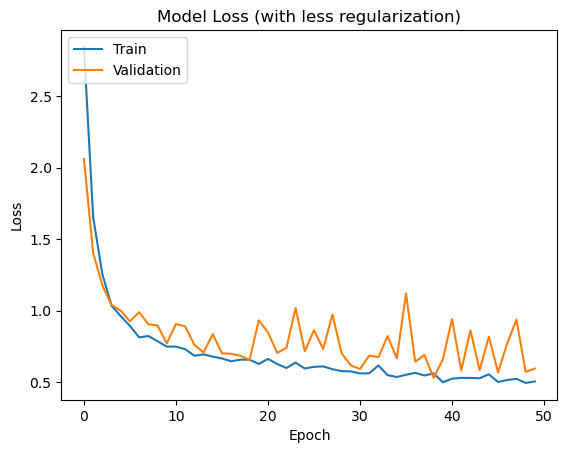

In [11]:
plt.plot(newer_history.history["loss"])
plt.plot(newer_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"accuracy on test set: {newer_model.evaluate(X_test, y_test)[1]}")

slighty better! our cv and standard are a bit more closer 

In [12]:
more_reg_model = keras.Sequential([
    tf.keras.Input(shape=(2700,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax'),
])

more_reg_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [keras.metrics.CategoricalAccuracy()],
)

more_reg_history = more_reg_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
)


Epoch 1/30
497/497 [==============================] - 1s 2ms/step - loss: 2.5941 - categorical_accuracy: 0.3107 - val_loss: 1.6531 - val_categorical_accuracy: 0.5414
Epoch 2/30
497/497 [==============================] - 1s 1ms/step - loss: 1.3625 - categorical_accuracy: 0.6167 - val_loss: 1.0754 - val_categorical_accuracy: 0.7075
Epoch 3/30
497/497 [==============================] - 1s 1ms/step - loss: 0.9459 - categorical_accuracy: 0.7354 - val_loss: 0.9931 - val_categorical_accuracy: 0.7234
Epoch 4/30
497/497 [==============================] - 1s 1ms/step - loss: 0.7671 - categorical_accuracy: 0.7914 - val_loss: 1.2833 - val_categorical_accuracy: 0.6540
Epoch 5/30
497/497 [==============================] - 1s 1ms/step - loss: 0.6899 - categorical_accuracy: 0.8093 - val_loss: 0.5810 - val_categorical_accuracy: 0.8522
Epoch 6/30
497/497 [==============================] - 1s 2ms/step - loss: 0.6002 - categorical_accuracy: 0.8360 - val_loss: 0.6827 - val_categorical_accuracy: 0.8122
Epoc

166/166 [==============================] - 0s 542us/step - loss: 0.4162 - categorical_accuracy: 0.9216
accuracy on test set: 0.9215797185897827


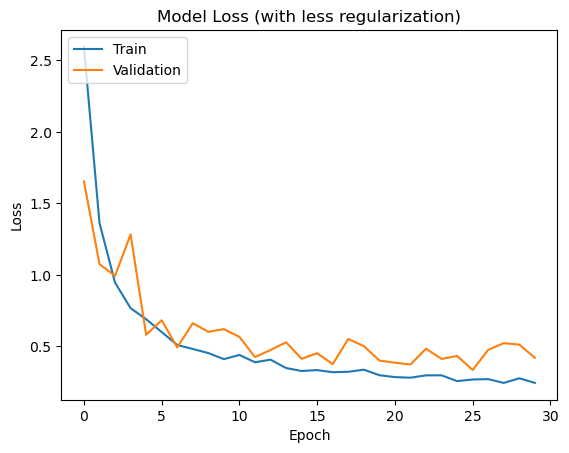

In [13]:
plt.plot(more_reg_history.history["loss"])
plt.plot(more_reg_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"accuracy on test set: {more_reg_model.evaluate(X_test, y_test)[1]}")

much closer, lets pull more epochs and more reg to see if we can make the loss closer

In [14]:
ultimate_final_model = keras.Sequential([
    tf.keras.Input(shape=(2700,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax'),
])

ultimate_final_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [keras.metrics.CategoricalAccuracy()],
)

final_history = ultimate_final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
)


Epoch 1/60
497/497 [==============================] - 1s 2ms/step - loss: 2.6653 - categorical_accuracy: 0.2891 - val_loss: 1.7188 - val_categorical_accuracy: 0.5172
Epoch 2/60
497/497 [==============================] - 1s 1ms/step - loss: 1.3789 - categorical_accuracy: 0.6033 - val_loss: 1.1115 - val_categorical_accuracy: 0.6763
Epoch 3/60
497/497 [==============================] - 1s 2ms/step - loss: 0.9489 - categorical_accuracy: 0.7314 - val_loss: 0.7498 - val_categorical_accuracy: 0.8059
Epoch 4/60
497/497 [==============================] - 1s 1ms/step - loss: 0.7548 - categorical_accuracy: 0.7910 - val_loss: 0.7403 - val_categorical_accuracy: 0.8144
Epoch 5/60
497/497 [==============================] - 1s 1ms/step - loss: 0.6538 - categorical_accuracy: 0.8217 - val_loss: 0.5926 - val_categorical_accuracy: 0.8604
Epoch 6/60
497/497 [==============================] - 1s 1ms/step - loss: 0.5777 - categorical_accuracy: 0.8437 - val_loss: 0.6988 - val_categorical_accuracy: 0.8186
Epoc

166/166 [==============================] - 0s 657us/step - loss: 0.4162 - categorical_accuracy: 0.9216
accuracy on test set: 0.9215797185897827


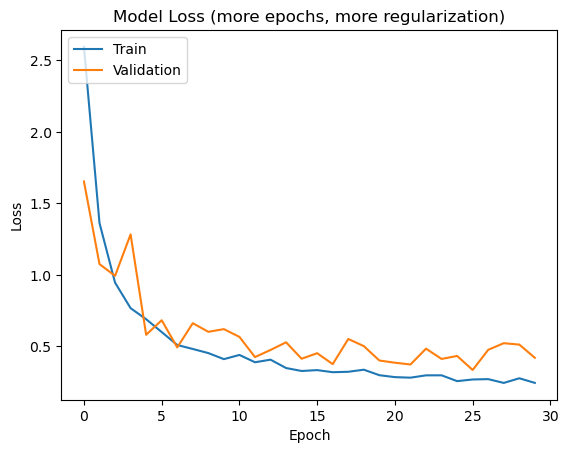

In [17]:
plt.plot(more_reg_history.history["loss"])
plt.plot(more_reg_history.history["val_loss"])
plt.title("Model Loss (more epochs, more regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"accuracy on test set: {more_reg_model.evaluate(X_test, y_test)[1]}")


### sweet :) we'll take these results as the cv and training fairly close, and have a pretty solid accuracy ! 

2/2 [==============================] - 0s 1ms/step


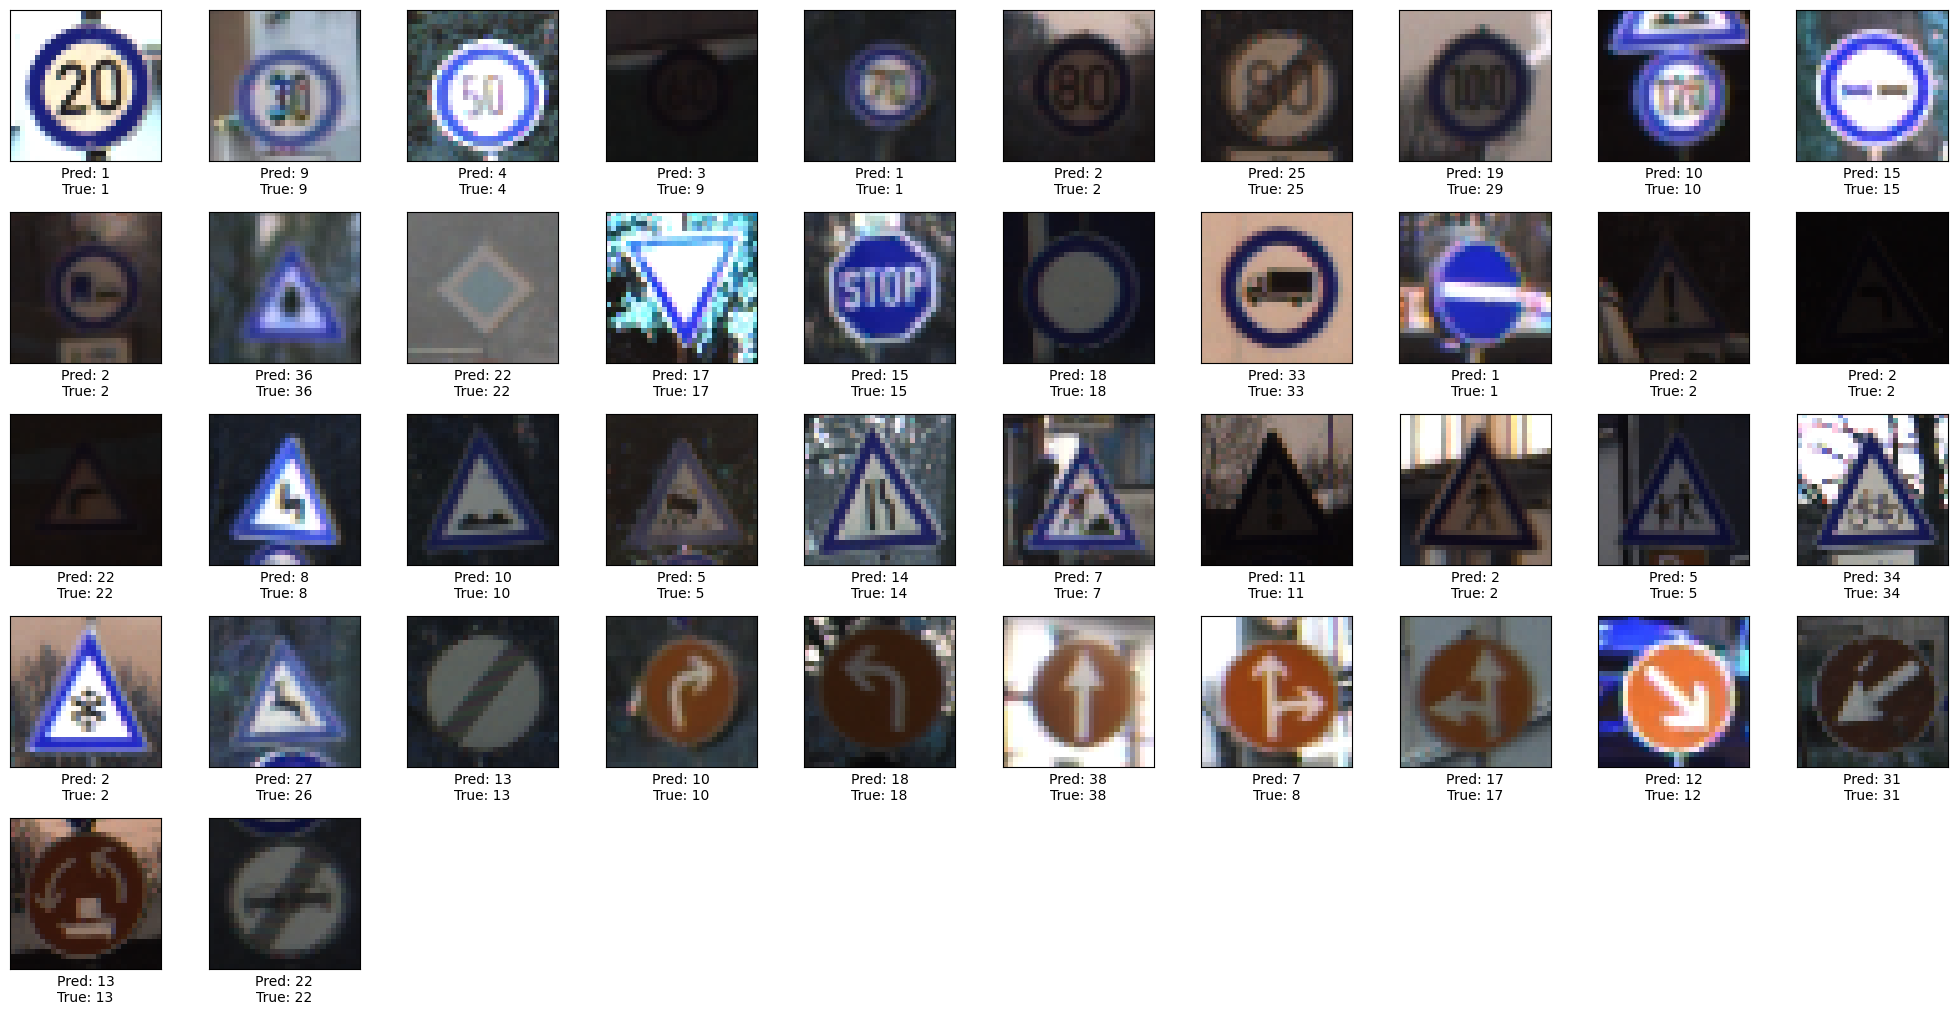

In [16]:
# totally took this from the internet, but this is more for me to see how the model is doing
# thank the universe for smarter people than me🙏

plt.figure(figsize=(20, 20))  # Adjust figure size if needed

# Generate predictions on a batch of test images
predictions = ultimate_final_model.predict(X_test[:len(category_images)])  # Adjust to match your display count
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:len(category_images)], axis=1)

# Display images along with predictions and true labels
for i, (label, image) in enumerate(category_images.items()):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='binary')
    
    # Use predicted label and true label
    pred_label = predicted_labels[i]
    true_label = true_labels[i]
    
    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.show()
